In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df1 = pd.read_csv('Datasets/IPLGameByGame.csv')
df = pd.read_csv('IPLFullBallbyBall.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Season,StartDate,Innings,Ball,Over,BallInOver,TotalBalls,BattingTeam,...,wicket_type,player_dismissed,BatHand,BatCountry,WK,BowlHand,BowlType,BowlCountry,City,Venue
0,0,335982,2008,4/18/2008,1,0.1,1,1,1,Kolkata Knight Riders,...,0,NaN,left,India,0,right,medium,India,Bangalore,M Chinnaswamy Stadium
1,1,335982,2008,4/18/2008,1,0.2,1,2,2,Kolkata Knight Riders,...,0,NaN,right,New Zealand,1,right,medium,India,Bangalore,M Chinnaswamy Stadium
2,2,335982,2008,4/18/2008,1,0.3,1,2,2,Kolkata Knight Riders,...,0,NaN,right,New Zealand,1,right,medium,India,Bangalore,M Chinnaswamy Stadium
3,3,335982,2008,4/18/2008,1,0.4,1,3,3,Kolkata Knight Riders,...,0,NaN,right,New Zealand,1,right,medium,India,Bangalore,M Chinnaswamy Stadium
4,4,335982,2008,4/18/2008,1,0.5,1,4,4,Kolkata Knight Riders,...,0,NaN,right,New Zealand,1,right,medium,India,Bangalore,M Chinnaswamy Stadium


In [4]:
df.shape

(225954, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        225954 non-null  int64  
 1   ID                225954 non-null  int64  
 2   Season            225954 non-null  int64  
 3   StartDate         225954 non-null  object 
 4   Innings           225954 non-null  int64  
 5   Ball              225954 non-null  float64
 6   Over              225954 non-null  int64  
 7   BallInOver        225954 non-null  int64  
 8   TotalBalls        225954 non-null  int64  
 9   BattingTeam       225954 non-null  object 
 10  BowlingTeam       225954 non-null  object 
 11  Striker           225954 non-null  object 
 12  NonStriker        225954 non-null  object 
 13  Bowler            225954 non-null  object 
 14  RunsOffBat        225954 non-null  int64  
 15  RunsOffBowler     225954 non-null  int64  
 16  Runs              22

In [6]:
df1

,ID,City,Date,Season,Play Off,MatchNumber,Team1,Team2,BatFirst,BatSecond,...,SuperOver,WinningTeam,WonBy,Margin,method,PlayerOfMatch,Team1Players,Team2Players,Umpire1,Umpire2
0,335982,Bangalore,4/18/2008,2008,0,1,Royal Challengers Bangalore,Kolkata Knight Riders,222.0,82,...,N,Kolkata Knight Riders,Runs,140,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,2008,0,2,Kings XI Punjab,Chennai Super Kings,240.0,207,...,N,Chennai Super Kings,Runs,33,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
2,335984,Delhi,4/19/2008,2008,0,3,Delhi Capitals,Rajasthan Royals,129.0,132,...,N,Delhi Capitals,Wickets,9,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/2008,2008,0,5,Mumbai Indians,Royal Challengers Bangalore,110.0,112,...,N,Royal Challengers Bangalore,Wickets,5,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
4,335986,Kolkata,4/20/2008,2008,0,4,Kolkata Knight Riders,Sunrisers Hyderabad,165.0,166,...,N,Kolkata Knight Riders,Wickets,5,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,1304116,Mumbai,5/22/2022,2022,0,70,Sunrisers Hyderabad,Punjab Kings,157.0,160,...,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
942,1312197,Kolkata,5/24/2022,2022,1,Qualifier 1,Rajasthan Royals,Gujarat Titans,188.0,191,...,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
943,1312198,Kolkata,5/25/2022,2022,1,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,207.0,193,...,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
944,1312199,Ahmedabad,5/27/2022,2022,1,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,157.0,161,...,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [7]:
df1.shape

(946, 25)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             946 non-null    int64  
 1   City           946 non-null    object 
 2   Date           946 non-null    object 
 3   Season         946 non-null    int64  
 4   Play Off       946 non-null    int64  
 5   MatchNumber    946 non-null    object 
 6   Team1          946 non-null    object 
 7   Team2          946 non-null    object 
 8   BatFirst       930 non-null    float64
 9   BatSecond      946 non-null    int64  
 10  Venue          946 non-null    object 
 11  TossWinner     946 non-null    object 
 12  TossDecision   946 non-null    object 
 13  BatFirstTeam   946 non-null    object 
 14  BatSecondTeam  946 non-null    object 
 15  SuperOver      946 non-null    object 
 16  WinningTeam    946 non-null    object 
 17  WonBy          946 non-null    object 
 18  Margin    

In [9]:
df2 = df1.drop(['Team1Players','Team2Players','Umpire1','Umpire2','PlayerOfMatch',
                'method','Margin','WonBy','SuperOver'], axis=1)

In [10]:
total_score_df = df.groupby(['ID', 'Innings'])['Runs'].sum().reset_index()

In [11]:
total_score_innings_1 = total_score_df[total_score_df['Innings'] == 2]
total_score_innings_1

df4 = df[df['Innings'] == 1].groupby('ID')['BattingTeam'].unique().reset_index(name='Bowling Team')
df4['Bowling Team'] = df4['Bowling Team'].apply(lambda x: x[0] if x else None)
df4.dropna(subset=['Bowling Team'], inplace=True)
total_score_innings_1 = total_score_innings_1.merge(df4[['ID','Bowling Team']], left_on = 'ID', right_on = 'ID')

In [12]:
total_score_innings_2 = total_score_df[total_score_df['Innings'] == 1]
total_score_innings_2

df5 = df[df['Innings'] == 2].groupby('ID')['BattingTeam'].unique().reset_index(name='Bowling Team')
df5['Bowling Team'] = df5['Bowling Team'].apply(lambda x: x[0] if x else None)
df5.dropna(subset=['Bowling Team'], inplace=True)
total_score_innings_2 = total_score_innings_2.merge(df5[['ID','Bowling Team']], left_on = 'ID', right_on = 'ID')

In [13]:
merge_df = total_score_innings_2.merge(total_score_innings_1[['ID','Innings','Runs','Bowling Team']],
                                       left_on = 'ID', right_on = 'ID')

In [14]:
merge_df = merge_df.rename(columns={
    'Innings_x': 'Innings_1',
    'Runs_x': 'Total_Runs_Innings_1',
    'Bowling Team_x': 'Bowling_Team_Innings_1',
    'Innings_y': 'Innings_2',
    'Runs_y': 'Total_Runs_Innings_2',
    'Bowling Team_y': 'Bowling_Team_Innings_2'
})

In [15]:
df6 = df2.merge(merge_df[['ID','Innings_1','Total_Runs_Innings_1','Bowling_Team_Innings_1',
                          'Innings_2','Total_Runs_Innings_2','Bowling_Team_Innings_2']], left_on = 'ID', right_on = 'ID')

In [16]:
bowling_team_innings_1 = df6['Bowling_Team_Innings_1']
bowling_team_innings_2 = df6['Bowling_Team_Innings_2']
df7 = pd.DataFrame({
    'ID': df6['ID'],
    'batting_team_innings_1': np.where(bowling_team_innings_1 == bowling_team_innings_2, bowling_team_innings_1, 
                                       bowling_team_innings_2),
    'batting_team_innings_2': np.where(bowling_team_innings_1 == bowling_team_innings_2, bowling_team_innings_2, 
                                       bowling_team_innings_1)
})

In [17]:
df8 = df6.merge(df7[['ID','batting_team_innings_1','batting_team_innings_2']],
                left_on = 'ID', right_on = 'ID')

In [18]:
columns = ['ID','Season','Date','MatchNumber','Venue','City','Team1','Team2','TossWinner',
           'TossDecision','Innings_1','batting_team_innings_1','Bowling_Team_Innings_1',
           'Total_Runs_Innings_1','Innings_2','batting_team_innings_2','Bowling_Team_Innings_2',
           'Total_Runs_Innings_2', 'WinningTeam',]
df9 = df8[columns]

In [19]:
for index, row in df9.iterrows():
    if pd.isnull(row['City']):
        city = row['Venue'].split(', ')[-1]
        df9.loc[index, 'City'] = city

In [20]:
for index, row in df9.iterrows():
    if pd.isnull(row['Season']):
        season = row['Date'].split('-')[1]
        df9.loc[index, 'Season'] = season

In [28]:
df10 = df9.copy() 
df10['id'] = range(len(df10), 0, -1)

df10 = df10.drop(['ID'], axis=1)

df10['losing_team'] = np.where(df10['WinningTeam'] == df10['Team1'], df10['Team2'], df10['Team1'])

columns = ['id','Season','Date','MatchNumber','Venue','City','Team1','Team2','TossWinner','TossDecision','Innings_1',
           'batting_team_innings_1','Bowling_Team_Innings_1','Total_Runs_Innings_1','Innings_2',
           'batting_team_innings_2','Bowling_Team_Innings_2','Total_Runs_Innings_2', 'WinningTeam','losing_team']
df10 = df10[columns]

In [22]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans', 
    'Lucknow Super Giants'
    'Pune Warriors'
    'Punjab Kings'
    'Kochi Tuskers Kerala'
    'Gujarat Lions'
]

In [23]:
df10 = df10[df10['Team1'].isin(teams)]
df10 = df10[df10['Team2'].isin(teams)]
df10 = df10[df10['WinningTeam'].isin(teams)]
df10 = df10[df10['TossWinner'].isin(teams)]
df10 = df10[df10['losing_team'].isin(teams)]
df10 = df10[df10['batting_team_innings_1'].isin(teams)]
df10 = df10[df10['Bowling_Team_Innings_1'].isin(teams)]
df10 = df10[df10['batting_team_innings_2'].isin(teams)]
df10 = df10[df10['Bowling_Team_Innings_2'].isin(teams)]

# Exploratory Data Analysis

In [25]:
plt.style.use('ggplot')

In [29]:
total_matches=(df10['Team1'].value_counts().sort_index()+df10['Team2'].value_counts().sort_index())

wins=df10['WinningTeam'].value_counts().sort_index()    #! Stats of the winning team

loss=df10['losing_team'].value_counts().sort_values()  #! Stats of the lost team

In [30]:
#! Summary of each teams history

match_history=pd.DataFrame({'TotalMatches':total_matches,'Wins':wins,'Loss':loss})
match_history.index.name='Teams'

match_history

,TotalMatches,Wins,Loss
Teams,,,
Chennai Super Kings,208,121,87
Delhi Capitals,222,103,119
Gujarat Lions,30,13,17
Gujarat Titans,16,12,4
Kings XI Punjab,190,88,102
Kochi Tuskers Kerala,14,6,8
Kolkata Knight Riders,223,114,109
Lucknow Super Giants,15,9,6
Mumbai Indians,231,131,100


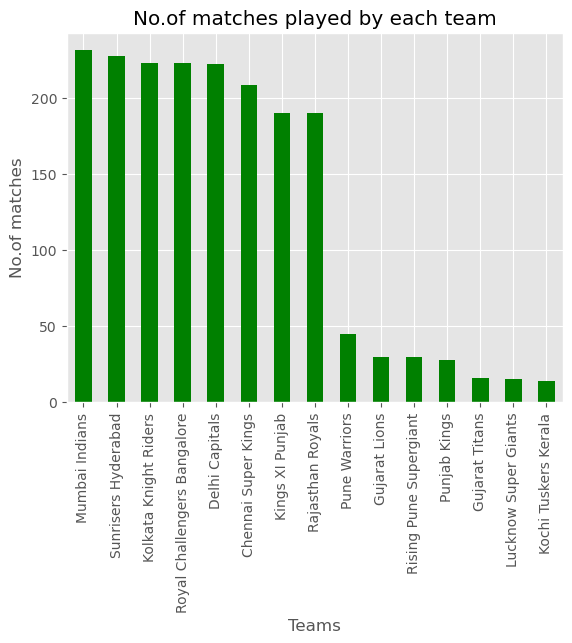

In [31]:
#! Visualizing no.of matches played by each team

match_history['TotalMatches'].sort_values(ascending=False).plot(kind='bar',color='green')

plt.xlabel('Teams')
plt.ylabel('No.of matches')
plt.title('No.of matches played by each team');

In [181]:
#! Winning Percentage of each team

match_history['%Win']=np.round((match_history['Wins']/match_history['TotalMatches'])*100,2)

match_history.sort_values(by='%Win',ascending=False)

,TotalMatches,Wins,Loss,%Win
Teams,,,,
Gujarat Titans,12,9,3,75.00
Mumbai Indians,177,104,73,58.76
Chennai Super Kings,167,97,70,58.08
Delhi Capitals,57,32,25,56.14
Kolkata Knight Riders,173,84,89,48.55
Sunrisers Hyderabad,124,57,67,45.97
Rajasthan Royals,151,69,82,45.70
Royal Challengers Bangalore,170,75,95,44.12
Kings XI Punjab,143,60,83,41.96


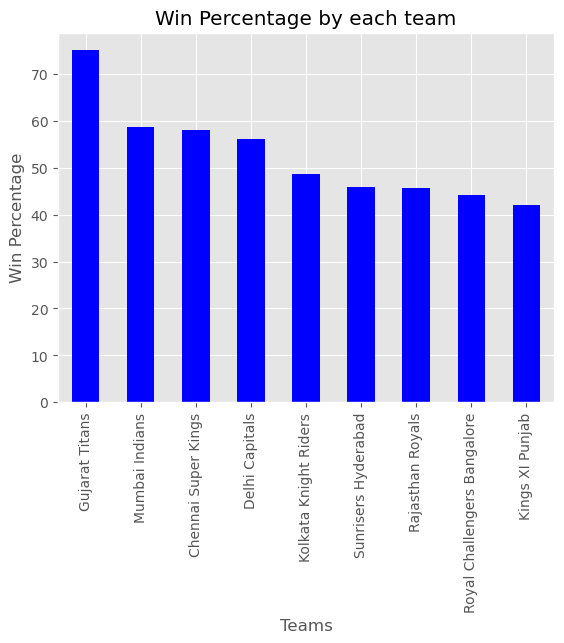

In [182]:
#! Visualizing winning percentage of each team

match_history['%Win'].sort_values(ascending=False).plot(kind='bar',color='blue')
plt.ylabel('Win Percentage')
plt.title('Win Percentage by each team');

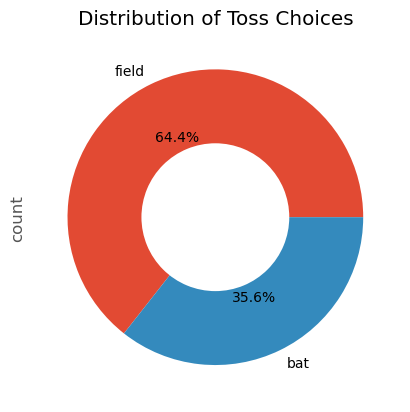

In [149]:
#! Distribution of choices at the Toss

df10['TossDecision'].value_counts().plot(kind='pie',autopct='%.1f%%',radius=1);
plt.pie([1],radius=0.5,colors='white')
plt.title('Distribution of Toss Choices');

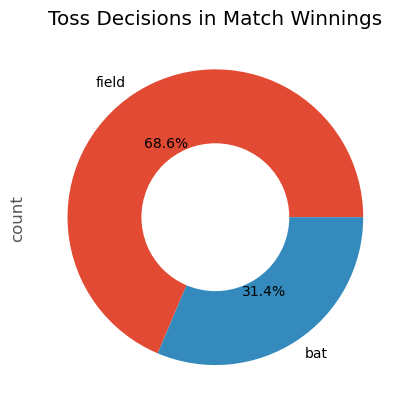

In [151]:
#! If a team had won the toss and also won the game, what might be the percentage of Toss decision?

df10.loc[(df10['TossWinner']==df10['WinningTeam']),'TossDecision'].value_counts().plot(kind='pie',autopct='%.1f%%',radius=1);
plt.pie([1],radius=0.5,colors='white')
plt.title('Toss Decisions in Match Winnings');

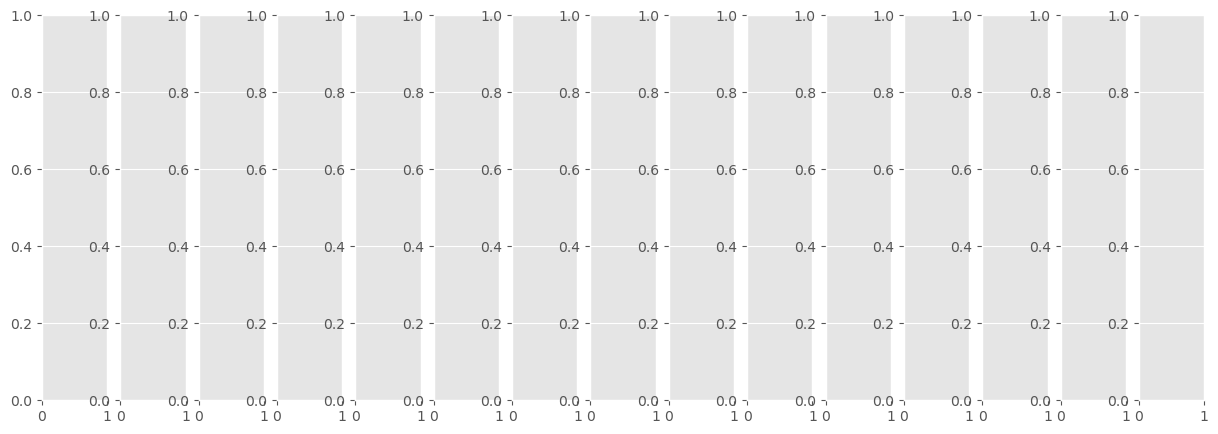

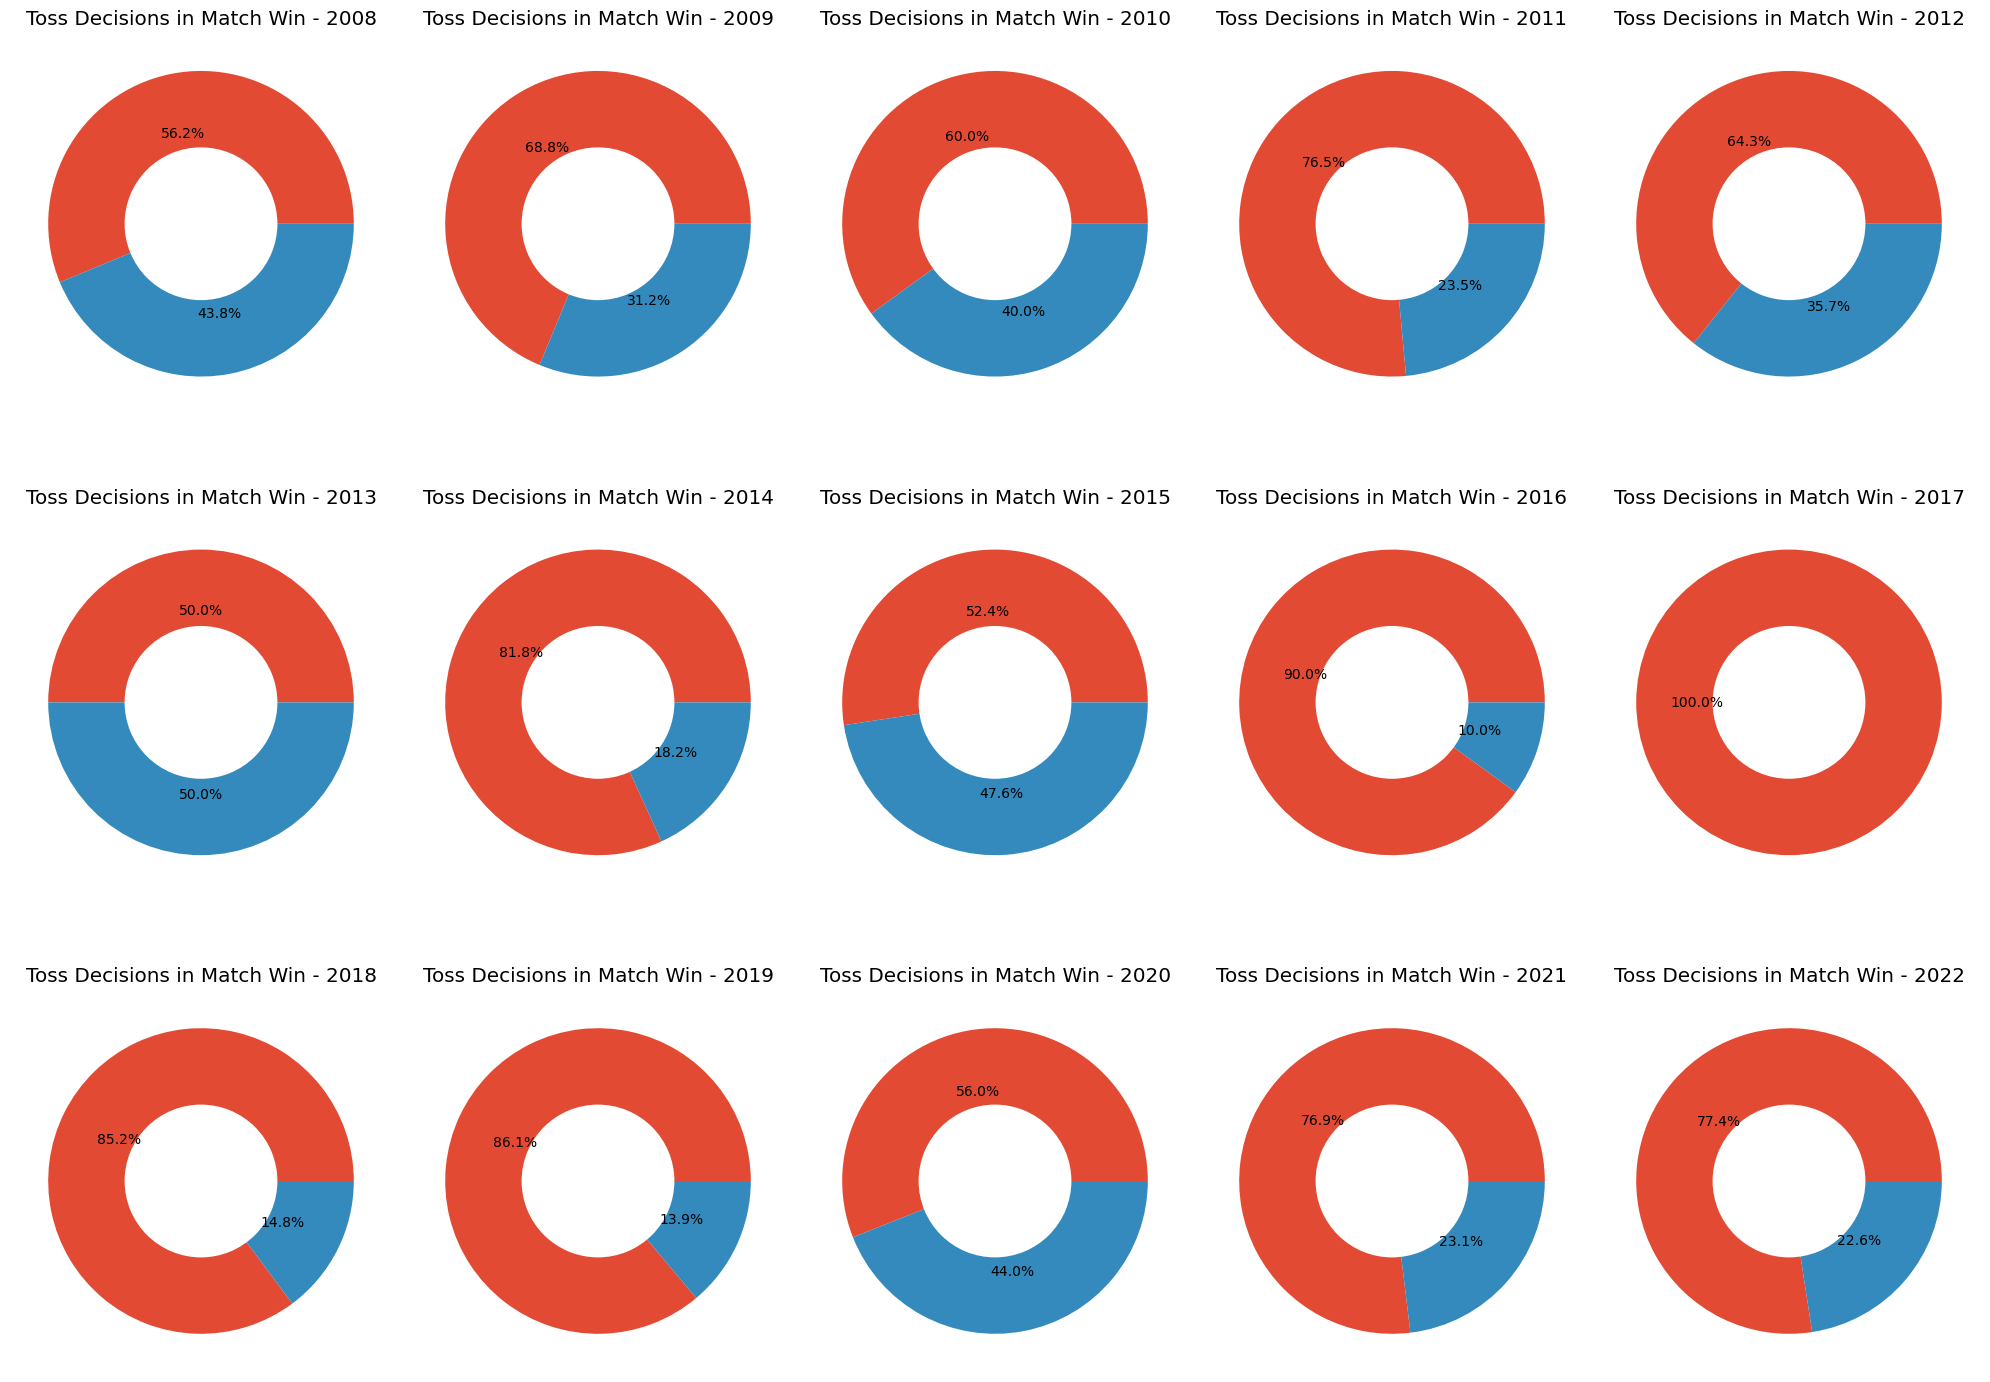

In [152]:
#! Compiling toss decision data by season and graphing it for each season
grouped_data = df10.groupby('Season')
fig, axs = plt.subplots(1, len(grouped_data), figsize=(15, 5))
num_seasons = len(grouped_data)
num_rows = (num_seasons + 4) // 5 

fig, axs = plt.subplots(num_rows, 5, figsize=(20, 5 * num_rows))

for i, (season, season_data) in enumerate(grouped_data):
    row = i // 5
    col = i % 5
    axs[row, col].pie(season_data.loc[(season_data['TossWinner'] == season_data['WinningTeam']), 'TossDecision'].value_counts(), autopct='%.1f%%', radius=1)
    axs[row, col].pie([1], radius=0.5, colors='white') 
    axs[row, col].set_title(f'Toss Decisions in Match Win - {season}')

for i in range(num_seasons, num_rows * 5):
    row = i // 5
    col = i % 5
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [32]:
#! Calculating the win and loss percentage based on toss decision

toss_field=df10.loc[(df10['TossDecision']=='field') & (df10['WinningTeam']==df10['TossWinner']),'WinningTeam'].value_counts().sort_index()
toss_field['Pune Warriors']=0
toss_field=toss_field.sort_index()

toss_bat=df10.loc[(df10['TossDecision']=='bat') & (df10['WinningTeam']==df10['TossWinner']),'WinningTeam'].value_counts().sort_index()
toss_bat['Kochi Tuskers Kerala']=0
toss_bat['Pune Warriors']=0
toss_bat['Rising Pune Supergiant']=0
toss_bat['Gujarat Lions']=0
toss_bat['Punjab Kings']=0
toss_bat=toss_bat.sort_index()

toss_bat_lose = df10.loc[(df10['TossDecision']=='bat') & (df10['WinningTeam']==df10['TossWinner']),'losing_team'].value_counts().sort_index()
toss_field_lose = df10.loc[(df10['TossDecision']=='field') & (df10['WinningTeam']==df10['TossWinner']),'losing_team'].value_counts().sort_index()
toss_win = toss_bat + toss_field
toss_lose = toss_bat_lose + toss_field_lose
match_history['%Win Field'] = toss_field / (toss_field_lose + toss_field)
match_history['%Win Bat'] = toss_bat / (toss_bat_lose + toss_bat)
new_row_names = ['CSK', 'DC', 'GL', 'GT', 'KXIP', 'KTK', 'KKR', 'LSG', 'MI', 'PW', 'PK', 'RR', 'RPS', 'RCB', 'SH']
match_history = match_history.rename(index=dict(zip(match_history.index, new_row_names)))
match_history

,TotalMatches,Wins,Loss,%Win Field,%Win Bat
Teams,,,,,
CSK,208,121,87,0.530303,0.687500
DC,222,103,119,0.518987,0.405405
GL,30,13,17,0.454545,NaN
GT,16,12,4,0.833333,NaN
KXIP,190,88,102,0.454545,0.260870
KTK,14,6,8,0.666667,0.000000
KKR,223,114,109,0.522727,0.514286
LSG,15,9,6,0.666667,0.500000
MI,231,131,100,0.546667,0.690476


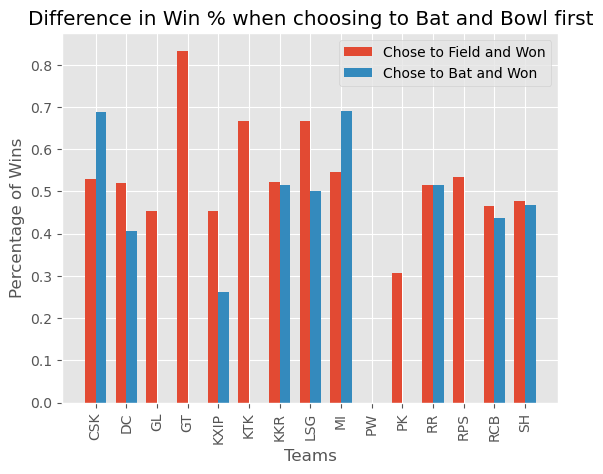

In [33]:
#! Graphing win percentage based on toss decision

bar_width=0.35
x=np.arange(len(match_history.index))

fig,ax=plt.subplots()

bars1=ax.bar(x-bar_width/2,match_history['%Win Field'].values,bar_width,label='Chose to Field and Won')
bars1=ax.bar(x+bar_width/2,match_history['%Win Bat'].values,bar_width,label='Chose to Bat and Won')

ax.set_xlabel('Teams')
ax.set_ylabel('Percentage of Wins')
ax.set_title('Difference in Win % when choosing to Bat and Bowl first')
ax.set_xticks(x)
ax.set_xticklabels(match_history.index)
ax.legend()
plt.xticks(rotation=90);

In [34]:
df = df.dropna(subset=['City']) #! these rows in games that have no result so we will delete from dataset

In [36]:
#! Calculating the average amount of runs and wickets scored of each delivery in the game

total_deliveries=df['TotalBalls'].value_counts().sort_index()
runs_off_balls = df.groupby('TotalBalls')['Runs'].mean()
wickets_off_balls = df.groupby('TotalBalls')['Wicket'].mean()

ball_history=pd.DataFrame({'TotalBalls':total_deliveries,'Runs':runs_off_balls,'Wickets':wickets_off_balls})
ball_history.index.name='TotalBalls'

ball_history['Total Runs'] = ball_history['Runs'].cumsum()

ball_history

,TotalBalls,Runs,Wickets,Total Runs
TotalBalls,,,,
1,3554,1.045020,0.036016,1.045020
2,3312,1.089976,0.042271,2.134996
3,3288,1.145681,0.037713,3.280677
4,3289,1.195500,0.039526,4.476177
5,3272,1.187653,0.039425,5.663830
...,...,...,...,...
116,732,1.719945,0.129781,155.498428
117,712,1.747191,0.109551,157.245619
118,703,1.769559,0.137980,159.015178


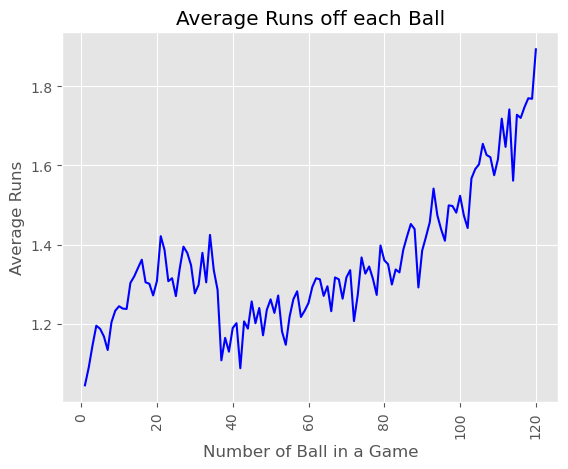

In [37]:
#! Graphing out the average runs off each ball

ball_history['Runs'].plot(kind='line',color='blue')
plt.ylabel('Average Runs')
plt.xlabel('Number of Ball in a Game')
plt.title('Average Runs off each Ball')
plt.xticks(rotation=90);

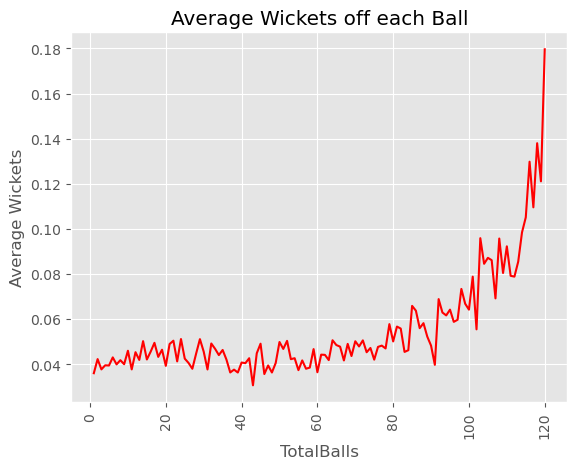

In [38]:
#! Graphing the average wickets off each ball

ball_history['Wickets'].plot(kind='line',color='red')
plt.ylabel('Average Wickets')
plt.title('Average Wickets off each Ball')
plt.xticks(rotation=90);

In [39]:
#! Compiling total number of runs and balls faced by left and right handed batsmen

batsmen_runs = df.groupby('BatHand')['Runs'].sum().sort_index()
batsmen_balls = df['BatHand'].value_counts().sort_index()
batsmen_data = pd.DataFrame({'Total Runs':batsmen_runs, 'Total Balls':batsmen_balls})
batsmen_data['Strike Rate'] = 100 * batsmen_data['Total Runs']/batsmen_data['Total Balls']
batsmen_data

,Total Runs,Total Balls,Strike Rate
BatHand,,,
left,98667,74489,132.458484
right,196882,151093,130.305176


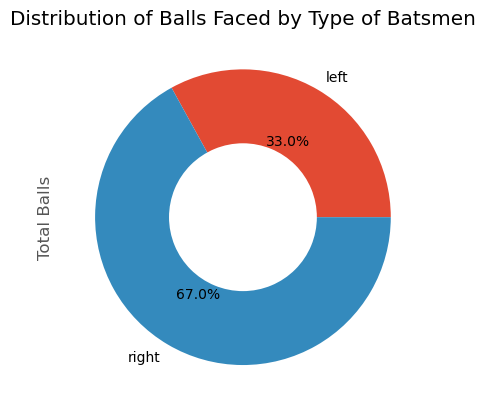

In [40]:
#! Graphing the difference in balls faced by right and left handed batsmen

batsmen_data['Total Balls'].plot(kind='pie',autopct='%.1f%%',radius=1);
plt.pie([1],radius=0.5,colors='white')
plt.title('Distribution of Balls Faced by Type of Batsmen');

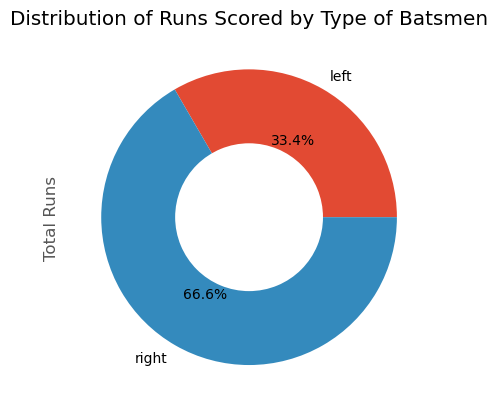

In [41]:
#! Graphing the difference in runs scored by right and left handed batsmen

batsmen_data['Total Runs'].plot(kind='pie',autopct='%.1f%%',radius=1);
plt.pie([1],radius=0.5,colors='white')
plt.title('Distribution of Runs Scored by Type of Batsmen');

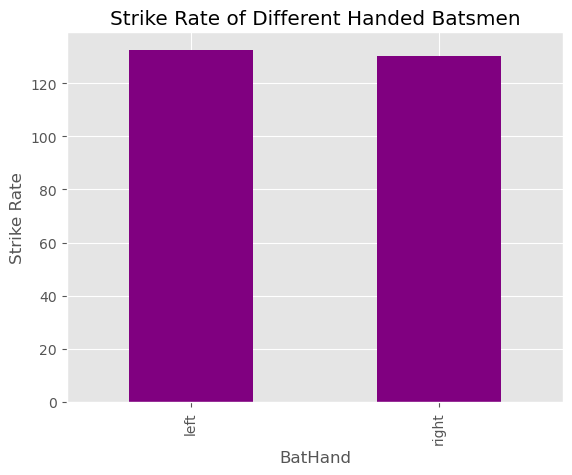

In [42]:
#! Graphing the difference in strike rates for right and left handed batsmen

batsmen_data['Strike Rate'].plot(kind='bar',color='purple')
plt.ylabel('Strike Rate')
plt.title('Strike Rate of Different Handed Batsmen');

In [43]:
#! Compiling data and stats for different types of bowlers

bowler_runs = df.groupby('BowlType')['Runs'].sum().sort_index()
bowler_balls = df['BowlType'].value_counts().sort_index()
bowler_wickets = df.groupby('BowlType')['BowlerWicket'].sum().sort_index()
bowler_data = pd.DataFrame({'Total Balls':bowler_balls, 'Total Runs':bowler_runs, 'Total Wickets':bowler_wickets})
bowler_data['Average'] = bowler_data['Total Runs'] / bowler_data['Total Wickets']
bowler_data['Economy'] = (bowler_data['Total Runs']/bowler_data['Total Balls'])*6
bowler_data

,Total Balls,Total Runs,Total Wickets,Average,Economy
BowlType,,,,,
fast,82510,110280,3929,28.068211,8.019392
leg spin,28605,36290,1373,26.431173,7.611956
medium,62493,84753,2805,30.214973,8.137199
off spin,27217,33089,1035,31.970048,7.294485
orthodox,23701,29710,925,32.118919,7.521202
unorthodox,1056,1427,42,33.976190,8.107955


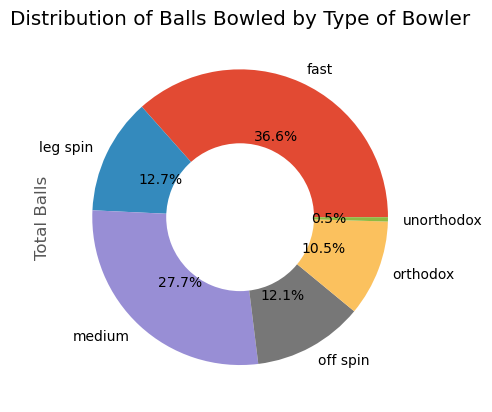

In [44]:
#! Illustrating the distribution of balls bowled by each type of bowler

bowler_data['Total Balls'].plot(kind='pie',autopct='%.1f%%',radius=1);
plt.pie([1],radius=0.5,colors='white')
plt.title('Distribution of Balls Bowled by Type of Bowler');

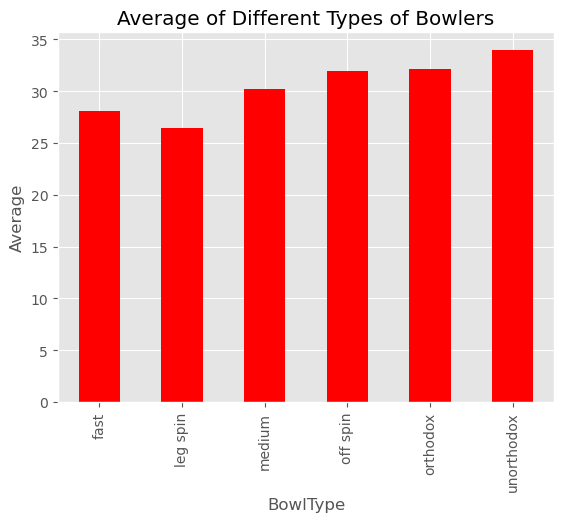

In [45]:
#! Graphing the difference in bowling averages for each different type of bowler

bowler_data['Average'].plot(kind='bar',color='red')
plt.ylabel('Average')
plt.title('Average of Different Types of Bowlers');

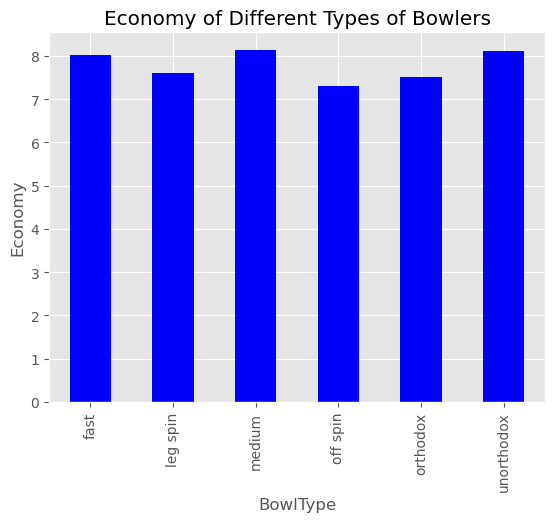

In [46]:
#! Graphing the difference in bowling economy for each different type of bowler

bowler_data['Economy'].plot(kind='bar',color='blue')
plt.ylabel('Economy')
plt.title('Economy of Different Types of Bowlers');

In [47]:
#! Creating data and stats for different bowlers in different stages of the game
#! Powerplay = overs 1 to 6, Middle of the Game = overs 7 to 14, End of the Game = 15 to 20

powerplay_data = df[(df['TotalBalls'] >= 1) & (df['TotalBalls'] <= 36)]
pp_bowler_runs = powerplay_data.groupby('BowlType')['Runs'].sum().sort_index()
pp_bowler_balls = powerplay_data['BowlType'].value_counts().sort_index()
pp_bowler_wickets = powerplay_data.groupby('BowlType')['BowlerWicket'].sum().sort_index()
pp_bowler_average = pp_bowler_runs / pp_bowler_wickets
pp_bowler_economy = (pp_bowler_runs / pp_bowler_balls) * 6
bowler_data['PP Average'] = pp_bowler_average
bowler_data['PP Economy'] = pp_bowler_economy
bowler_data['PP Total Balls'] = pp_bowler_balls

middlegame_data = df[(df['TotalBalls'] >= 37) & (df['TotalBalls'] <= 84)]
mg_bowler_runs = middlegame_data.groupby('BowlType')['Runs'].sum().sort_index()
mg_bowler_balls = middlegame_data['BowlType'].value_counts().sort_index()
mg_bowler_wickets = middlegame_data.groupby('BowlType')['BowlerWicket'].sum().sort_index()
mg_bowler_average = mg_bowler_runs / mg_bowler_wickets
mg_bowler_economy = (mg_bowler_runs / mg_bowler_balls) * 6
bowler_data['MG Average'] = mg_bowler_average
bowler_data['MG Economy'] = mg_bowler_economy
bowler_data['MG Total Balls'] = mg_bowler_balls

endgame_data = df[(df['TotalBalls'] >= 85) & (df['TotalBalls'] <= 120)]
eg_bowler_runs = endgame_data.groupby('BowlType')['Runs'].sum().sort_index()
eg_bowler_balls = endgame_data['BowlType'].value_counts().sort_index()
eg_bowler_wickets = endgame_data.groupby('BowlType')['BowlerWicket'].sum().sort_index()
eg_bowler_average = eg_bowler_runs / eg_bowler_wickets
eg_bowler_economy = (eg_bowler_runs / eg_bowler_balls) * 6
bowler_data['EG Average'] = eg_bowler_average
bowler_data['EG Economy'] = eg_bowler_economy
bowler_data['EG Total Balls'] = eg_bowler_balls

bowler_data

,Total Balls,Total Runs,Total Wickets,Average,Economy,PP Average,PP Economy,PP Total Balls,MG Average,MG Economy,MG Total Balls,EG Average,EG Economy,EG Total Balls
BowlType,,,,,,,,,,,,,,
fast,82510,110280,3929,28.068211,8.019392,31.144839,7.602854,44291,29.236018,7.775398,20169,22.725061,9.314127,18050
leg spin,28605,36290,1373,26.431173,7.611956,28.530822,7.626793,6554,27.736512,7.398672,17927,20.609155,8.515519,4124
medium,62493,84753,2805,30.214973,8.137199,32.354839,7.778286,30174,32.671480,7.826087,20815,24.164706,9.641516,11504
off spin,27217,33089,1035,31.970048,7.294485,35.662614,7.246320,9715,34.718750,7.076433,14130,20.756637,8.346975,3372
orthodox,23701,29710,925,32.118919,7.521202,33.716475,7.630058,6920,34.097959,7.230292,13865,24.149425,8.646091,2916
unorthodox,1056,1427,42,33.976190,8.107955,44.600000,8.158537,328,34.333333,7.328063,506,25.928571,9.810811,222


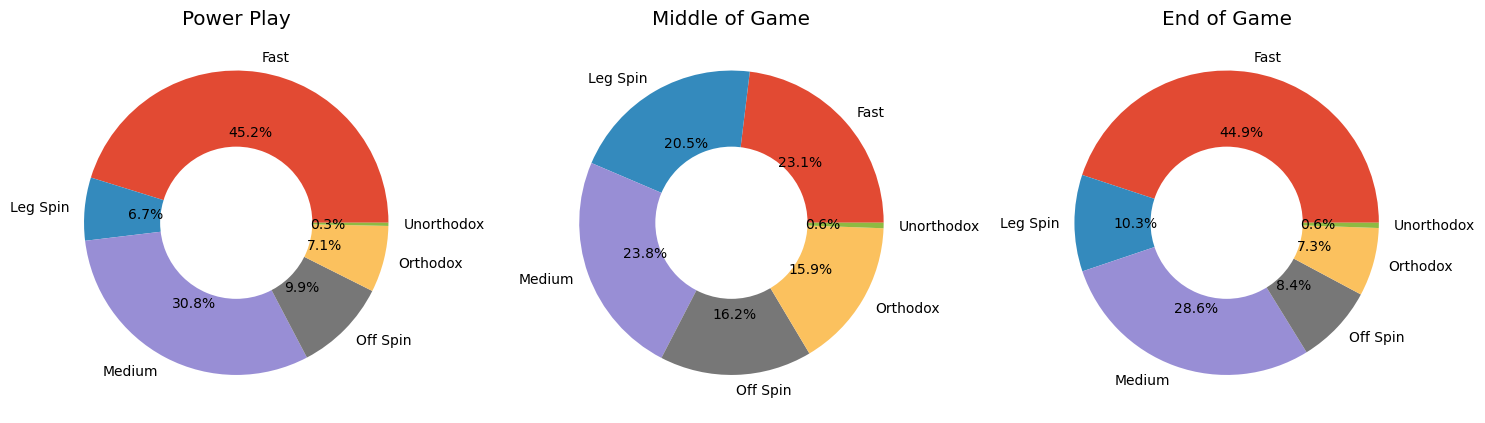

In [48]:
#! Illiustrating the how different bowlers are used in different stages of the game

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

labels = ['Fast', 'Leg Spin', 'Medium', 'Off Spin', 'Orthodox', 'Unorthodox']

axs[0].pie(bowler_data['PP Total Balls'], autopct='%.1f%%', labels=labels, radius=1)
axs[0].pie([1], radius=0.5, colors='white')
axs[0].set_title('Power Play')

axs[1].pie(bowler_data['MG Total Balls'], autopct='%.1f%%', labels=labels, radius=1)
axs[1].pie([1], radius=0.5, colors='white')
axs[1].set_title('Middle of Game')

axs[2].pie(bowler_data['EG Total Balls'], autopct='%.1f%%', labels=labels, radius=1)
axs[2].pie([1], radius=0.5, colors='white')
axs[2].set_title('End of Game')

plt.tight_layout() 

plt.show()

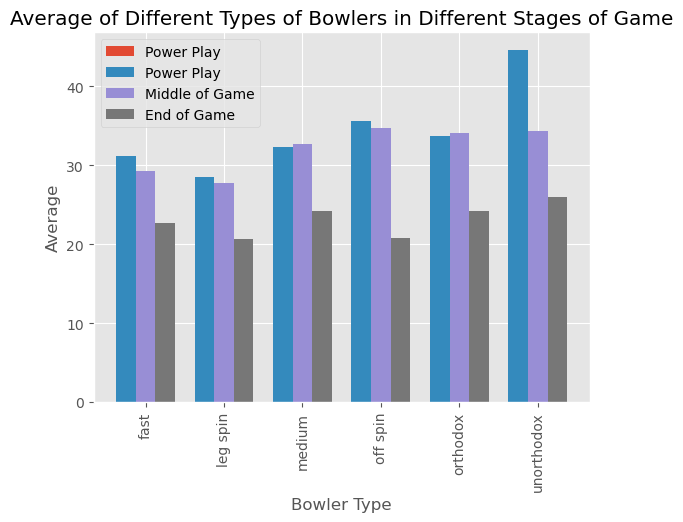

In [49]:
#! Illustrating the change in bowling averages for each type of bowler in different stages of the game

bar_width=0.25
x=np.arange(len(bowler_data.index))

fig,ax=plt.subplots()

bars1=ax.bar(x-bar_width,bowler_data['Average'].values,bar_width,label='Power Play')
bars2=ax.bar(x-bar_width,bowler_data['PP Average'].values,bar_width,label='Power Play')
bars3=ax.bar(x,bowler_data['MG Average'].values,bar_width,label='Middle of Game')
bars4=ax.bar(x+bar_width,bowler_data['EG Average'].values,bar_width,label='End of Game')


ax.set_xlabel('Bowler Type')
ax.set_ylabel('Average')
ax.set_title('Average of Different Types of Bowlers in Different Stages of Game')
ax.set_xticks(x)
ax.set_xticklabels(bowler_data.index)
ax.legend()
plt.xticks(rotation=90);

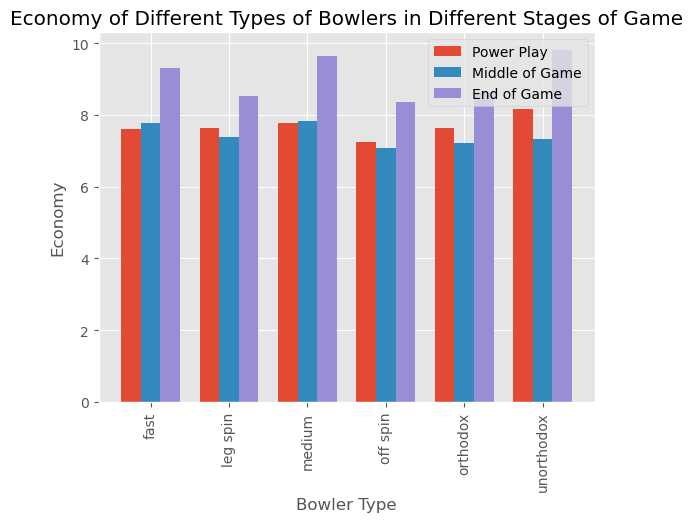

In [50]:
#! Illustrating the change in bowling economy for each type of bowler in different stages of the game

bar_width=0.25
x=np.arange(len(bowler_data.index))

fig,ax=plt.subplots()

bars1=ax.bar(x-bar_width,bowler_data['PP Economy'].values,bar_width,label='Power Play')
bars2=ax.bar(x,bowler_data['MG Economy'].values,bar_width,label='Middle of Game')
bars3=ax.bar(x+bar_width,bowler_data['EG Economy'].values,bar_width,label='End of Game')


ax.set_xlabel('Bowler Type')
ax.set_ylabel('Economy')
ax.set_title('Economy of Different Types of Bowlers in Different Stages of Game')
ax.set_xticks(x)
ax.set_xticklabels(bowler_data.index)
ax.legend()
plt.xticks(rotation=90);

# Feature Engineering

In [51]:
total_score_df = total_score_df[total_score_df['Innings'] == 1]
total_score_df.head()

,ID,Innings,Runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [52]:
df11 = df[df['Innings'] == 1].groupby('ID')['BattingTeam'].unique().reset_index(name='Bowling Team')
df11['Bowling Team'] = df11['Bowling Team'].apply(lambda x: x[0] if x else None)
df11.dropna(subset=['Bowling Team'], inplace=True)
df11.head()

,ID,Bowling Team
0,335982,Kolkata Knight Riders
1,335983,Chennai Super Kings
2,335984,Rajasthan Royals
3,335985,Mumbai Indians
4,335986,Deccan Chargers


In [53]:
total_score_df = total_score_df.merge(df11[['ID','Bowling Team']], left_on = 'ID', right_on = 'ID')
total_score_df.head()

,ID,Innings,Runs,Bowling Team
0,335982,1,222,Kolkata Knight Riders
1,335983,1,240,Chennai Super Kings
2,335984,1,129,Rajasthan Royals
3,335985,1,165,Mumbai Indians
4,335986,1,110,Deccan Chargers


In [54]:
df = df.merge(total_score_df[['ID', 'Bowling Team']], on='ID')
df.head()

,Unnamed: 0,ID,Season,StartDate,Innings,Ball,Over,BallInOver,TotalBalls,BattingTeam,...,player_dismissed,BatHand,BatCountry,WK,BowlHand,BowlType,BowlCountry,City,Venue,Bowling Team
0,0,335982,2008,4/18/2008,1,0.1,1,1,1,Kolkata Knight Riders,...,NaN,left,India,0,right,medium,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders
1,1,335982,2008,4/18/2008,1,0.2,1,2,2,Kolkata Knight Riders,...,NaN,right,New Zealand,1,right,medium,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders
2,2,335982,2008,4/18/2008,1,0.3,1,2,2,Kolkata Knight Riders,...,NaN,right,New Zealand,1,right,medium,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders
3,3,335982,2008,4/18/2008,1,0.4,1,3,3,Kolkata Knight Riders,...,NaN,right,New Zealand,1,right,medium,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders
4,4,335982,2008,4/18/2008,1,0.5,1,4,4,Kolkata Knight Riders,...,NaN,right,New Zealand,1,right,medium,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders


In [55]:
match_df = df1.merge(total_score_df[['ID','Runs','Bowling Team']], left_on = 'ID', right_on = 'ID')

In [56]:
match_df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [57]:
match_df['method'] = match_df['method'].fillna(0).replace({'D/L': 1})
match_df['method'] = match_df['method'].astype(int)

In [58]:
match_df = match_df[match_df['method'] == 0] #! not include matches decide by DL (rain effected/shortened games)

In [59]:
match_df1 = match_df[['ID','City','WinningTeam','Runs','Bowling Team']]
match_df1.head()

,ID,City,WinningTeam,Runs,Bowling Team
0,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders
1,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings
2,335984,Delhi,Delhi Capitals,129,Rajasthan Royals
3,335985,Mumbai,Royal Challengers Bangalore,165,Mumbai Indians
4,335986,Kolkata,Kolkata Knight Riders,110,Deccan Chargers


In [60]:
df12 = match_df1.merge(df,on='ID')

In [61]:
df12 = df12[df12['Innings'] == 2] #! only using innings 2 for win prediction model, so only take these values

In [62]:
df12.head()

,ID,City_x,WinningTeam,Runs_x,Bowling Team_x,Unnamed: 0,Season,StartDate,Innings,Ball,...,player_dismissed,BatHand,BatCountry,WK,BowlHand,BowlType,BowlCountry,City_y,Venue,Bowling Team_y
124,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,124,2008,4/18/2008,2,0.1,...,NaN,right,India,1,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders
125,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,125,2008,4/18/2008,2,0.2,...,NaN,right,India,0,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders
126,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,126,2008,4/18/2008,2,0.3,...,NaN,right,India,0,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders
127,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,127,2008,4/18/2008,2,0.4,...,NaN,right,India,0,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders
128,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,128,2008,4/18/2008,2,0.5,...,NaN,right,India,1,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders


In [63]:
#! making current score, runs left, and balls left variables

df12['Runs_y'] = pd.to_numeric(df12['Runs_y'], errors='coerce')
df12['current_score'] = df12.groupby('ID')['Runs_y'].cumsum()
df12['runs_left'] = df12['Runs_x'] - df12['current_score']
df12['balls_left'] = 120 - (df12['Over'] * 6 + df12['BallInOver'])
df12.head()

,ID,City_x,WinningTeam,Runs_x,Bowling Team_x,Unnamed: 0,Season,StartDate,Innings,Ball,...,WK,BowlHand,BowlType,BowlCountry,City_y,Venue,Bowling Team_y,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,124,2008,4/18/2008,2,0.1,...,1,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,1,221,113
125,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,125,2008,4/18/2008,2,0.2,...,0,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,2,220,113
126,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,126,2008,4/18/2008,2,0.3,...,0,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,2,220,112
127,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,127,2008,4/18/2008,2,0.4,...,0,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,3,219,111
128,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,128,2008,4/18/2008,2,0.5,...,1,right,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,4,218,110


In [64]:
#! creating wickets lost and wickets remaining variables

df12['player_dismissed'] = df12['player_dismissed'].replace([np.inf, -np.inf], np.nan).fillna(0)
df12['player_dismissed'] = pd.to_numeric(df12['player_dismissed'], errors='coerce')
df12['player_dismissed'] = df12['player_dismissed'].replace([np.inf, -np.inf, np.nan], -1)
df12['player_dismissed'] = df12['player_dismissed'].astype(int)
df12['player_dismissed'] = df12['player_dismissed'].apply(lambda x: 1 if x != 0 else 0)
df12['wickets'] = df12.groupby('ID')['player_dismissed'].cumsum()
df12['wickets_left'] = 10 - df12['wickets']
df12

,ID,City_x,WinningTeam,Runs_x,Bowling Team_x,Unnamed: 0,Season,StartDate,Innings,Ball,...,BowlType,BowlCountry,City_y,Venue,Bowling Team_y,current_score,runs_left,balls_left,wickets,wickets_left
124,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,124,2008,4/18/2008,2,0.1,...,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,1,221,113,0,10
125,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,125,2008,4/18/2008,2,0.2,...,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,2,220,113,0,10
126,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,126,2008,4/18/2008,2,0.3,...,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,2,220,112,0,10
127,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,127,2008,4/18/2008,2,0.4,...,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,3,219,111,0,10
128,335982,Bangalore,Kolkata Knight Riders,222,Kolkata Knight Riders,128,2008,4/18/2008,2,0.5,...,fast,India,Bangalore,M Chinnaswamy Stadium,Kolkata Knight Riders,4,218,110,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221602,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,226168,2022,5/29/2022,2,17.3,...,off spin,India,Ahmedabad,Narendra Modi Stadium,Rajasthan Royals,124,6,9,3,7
221603,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,226169,2022,5/29/2022,2,17.4,...,off spin,India,Ahmedabad,Narendra Modi Stadium,Rajasthan Royals,124,6,8,3,7
221604,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,226170,2022,5/29/2022,2,17.5,...,off spin,India,Ahmedabad,Narendra Modi Stadium,Rajasthan Royals,125,5,7,3,7
221605,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,226171,2022,5/29/2022,2,17.6,...,off spin,India,Ahmedabad,Narendra Modi Stadium,Rajasthan Royals,127,3,6,3,7


In [65]:
df12['crr'] = (df12['current_score']*6)/(120 - df12['balls_left']) #! current run rate at each ball
df12['rrr'] = (df12['runs_left']*6)/df12['balls_left'] #! required run rate at each ball

In [66]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [67]:
df12['result'] = df12.apply(result,axis=1) #! add result variable to dataset

In [68]:
#! Making the final dataframe to be used for the win prediction model

final_df = df12[['BattingTeam','Bowling Team_x','City_x','runs_left','balls_left',
                 'wickets_left','Runs_x','BowlType', 'crr','rrr','result']]
final_df.head()

,BattingTeam,Bowling Team_x,City_x,runs_left,balls_left,wickets_left,Runs_x,BowlType,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,113,10,222,fast,0.857143,11.734513,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,113,10,222,fast,1.714286,11.681416,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,112,10,222,fast,1.500000,11.785714,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,111,10,222,fast,2.000000,11.837838,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,218,110,10,222,fast,2.400000,11.890909,0


In [69]:
final_df = final_df.sample(final_df.shape[0])
final_df.sample()

,BattingTeam,Bowling Team_x,City_x,runs_left,balls_left,wickets_left,Runs_x,BowlType,crr,rrr,result
40276,Mumbai Indians,Chennai Super Kings,Mumbai,140,80,9,168,medium,4.2,10.5,0


In [70]:
final_df = final_df.dropna()

In [71]:
final_df = final_df[final_df['balls_left'] != 0]

# Model Architecture

In [72]:
#! Make training and testing set

X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [73]:
X_train

,BattingTeam,Bowling Team_x,City_x,runs_left,balls_left,wickets_left,Runs_x,BowlType,crr,rrr
118540,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,108,109,10,113,fast,2.727273,5.944954
34082,Kings XI Punjab,Kolkata Knight Riders,Kolkata,93,54,9,200,medium,9.727273,10.333333
95151,Royal Challengers Bangalore,Kolkata Knight Riders,Dubai,140,101,10,150,fast,3.157895,8.316832
126479,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,62,24,6,185,leg spin,7.687500,15.500000
195483,Royal Challengers Bangalore,Punjab Kings,Ahmedabad,147,83,9,179,leg spin,5.189189,10.626506
...,...,...,...,...,...,...,...,...,...,...
68497,Royal Challengers Bangalore,Deccan Chargers,Bangalore,55,19,6,181,medium,7.485149,17.368421
52922,Delhi Daredevils,Chennai Super Kings,Chennai,120,66,8,176,off spin,6.222222,10.909091
147173,Kings XI Punjab,Delhi Daredevils,Chandigarh,0,2,6,166,fast,8.440678,0.000000
115951,Rajasthan Royals,Sunrisers Hyderabad,Mumbai,66,18,5,201,fast,7.941176,22.000000


In [74]:
#! Setting up transformation step in the model

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','Bowling Team_x','City_x', 'BowlType'])
]
,remainder='passthrough')

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [84]:
# Logistic Regression Model

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [85]:
pipe.fit(X_train,y_train)

C:\Users\patri\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam',
                                                   'Bowling Team_x', 'City_x',
                                                   'BowlType'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [86]:
y_pred = pipe.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8412445527388595

In [88]:
pipe.predict_proba(X_test)[10]

array([0.99829668, 0.00170332])

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
# Random Forest Classifier

pipe2 = Pipeline(steps=[
     ('step1',trf),
     ('step2',RandomForestClassifier())
 ])

In [91]:
pipe2.fit(X_train,y_train)

C:\Users\patri\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam',
                                                   'Bowling Team_x', 'City_x',
                                                   'BowlType'])])),
                ('step2', RandomForestClassifier())])

In [92]:
y_pred = pipe2.predict(X_test)

In [93]:
accuracy_score(y_test,y_pred)

0.9989691204723302

In [104]:
pipe2.predict_proba(X_test)[10]

array([1., 0.])

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
#! Decision Tree Classifier Model

pipe3 = Pipeline(steps=[
    ('step1',trf),
    ('step2',DecisionTreeClassifier())
])

In [99]:
pipe3.fit(X_train,y_train)

C:\Users\patri\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam',
                                                   'Bowling Team_x', 'City_x',
                                                   'BowlType'])])),
                ('step2', DecisionTreeClassifier())])

In [100]:
accuracy_score(y_test,y_pred)

0.9989691204723302

In [101]:
y_pred = pipe3.predict(X_test)

In [102]:
pipe3.predict_proba(X_test)[10]

array([1., 0.])

In [105]:
def match_summary(row):
    print("BattingTeam-" + row['BattingTeam'] + " | Bowling Team_x-" 
          + row['Bowling Team_x'] + " | Target- " + str(row['Runs_x']))
    

In [120]:
#! Set up model

def match_progression(x_df, match_id, pipe):
    df12 = x_df[x_df['ID'] == match_id]
    df12 = df12[(df12['BallInOver'] == 6)]
    
    temp_df = df12[['BattingTeam', 'Bowling Team_x', 'City_x', 'runs_left', 'balls_left', 'wickets_left', 'Runs_x', 'BowlType', 'crr', 'rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    
    result = pipe.predict_proba(temp_df)
    
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    
    target = temp_df['Runs_x'].values[0]
    
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-", target)
    
    temp_df = temp_df[['end_of_over', 'runs_left', 'wickets_left', 'crr', 'rrr', 'runs_after_over', 'wickets_in_over', 'BowlType', 'lose', 'win', 'lose']]
    
    return temp_df, target

In [123]:
#! Select any game id and put it between df12 and pipe, and it will return the win and loss probability after every over

temp_df,target = match_progression(df12,1181768,pipe)
temp_df

Target- 149


,end_of_over,runs_left,wickets_left,crr,rrr,runs_after_over,wickets_in_over,BowlType,lose,win,lose
174592,1,142,10,3.500000,7.888889,7,0,fast,17.3,82.7,17.3
174598,2,137,10,4.000000,8.058824,5,0,orthodox,19.0,81.0,19.0
174604,3,130,10,4.750000,8.125000,7,0,fast,15.7,84.3,15.7
174610,4,116,9,6.600000,7.733333,14,1,orthodox,17.5,82.5,17.5
174616,5,111,9,6.333333,7.928571,5,0,fast,16.5,83.5,16.5
174623,6,96,9,7.571429,7.384615,15,0,fast,9.2,90.8,9.2
174630,7,92,9,7.125000,7.666667,4,0,fast,10.1,89.9,10.1
174636,8,89,9,6.666667,8.090909,3,0,leg spin,11.6,88.4,11.6
174643,9,79,9,7.000000,7.900000,10,0,fast,8.9,91.1,8.9
174649,10,77,8,6.545455,8.555556,2,1,leg spin,18.8,81.2,18.8


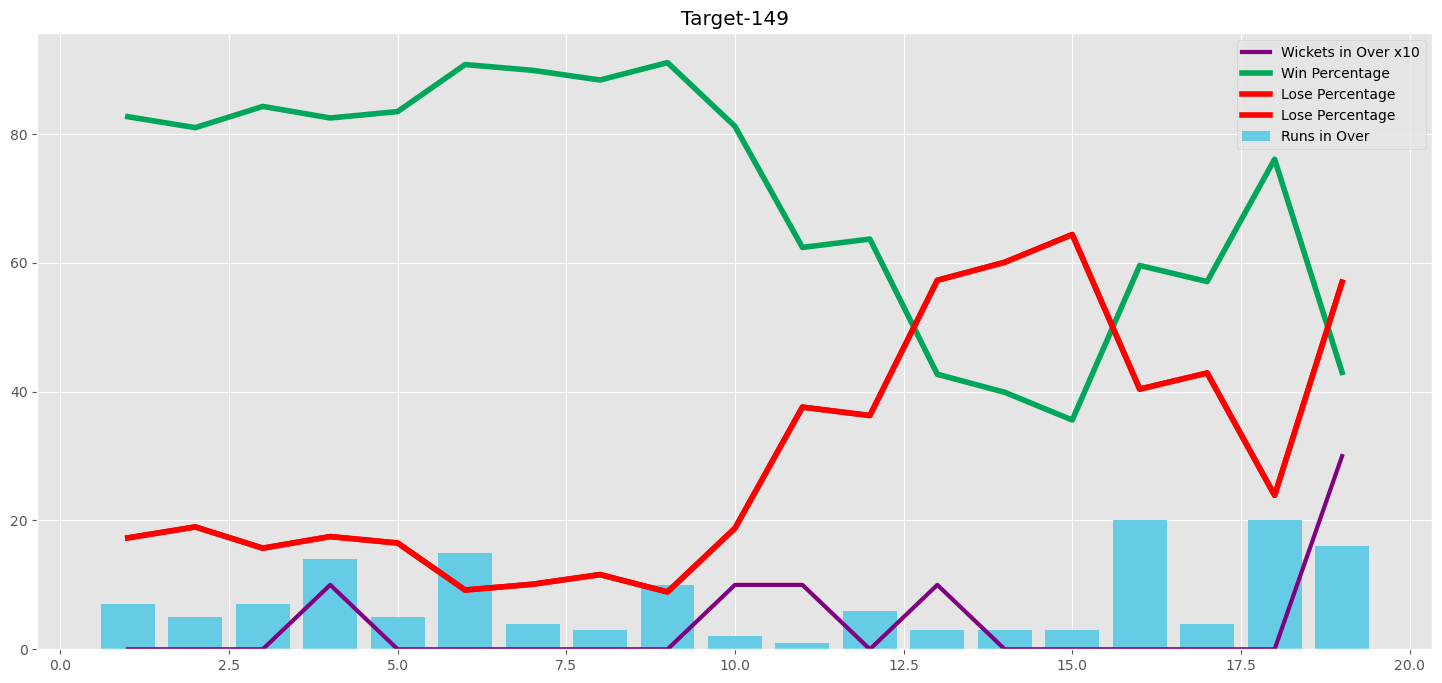

In [136]:
#! Visualizing the results of the win prediciton model

import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over']*10,color='purple',linewidth=3, label = 'Wickets in Over x10')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4, label = 'Win Percentage')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4, label = 'Lose Percentage')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'],color=(0.4, 0.8, 0.9), label = 'Runs in Over')
plt.title('Target-' + str(target))
plt.legend()